# TP2: Canny Edges

Read, understand, and complete the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). If you cannot/don't want to use notebooks, you can return both your python code and a report in pdf. 

Return your work by e-mail at `gabriel.fiastre@inria.fr` using a single file (ipynb or zip) with the format `LASTNAME_FirstName_TP2.ipynb`

The first part is about basic image processing in Python, the second guides you in the implementation of the Canny edge detector.

## 1. Playing with images in Python

Here are a set of useful libraries for image processing. You will need to refer to the online documentation of the different libraries to complete the TP.

In [1]:
# Numpy is the key library for manipulating arrays. 
# Use the online ressources: https://www.numpy.org/
import numpy as np 

# Matplotlib is the standard library used to show images
# The documentation is here: http://matplotlib.org/api/pyplot_api.html
# You can also check this simple intro to using ipython notebook with images:
# https://matplotlib.org/users/image_tutorial.html
import matplotlib.pyplot as plt 

# By default, the grayscale images are displayed with the jet colormap: use grayscale instead
plt.rcParams['image.cmap'] = 'gray' 

# By default (for matplotlib<3.2), images are rescaled without antialias: enforce it (see question 1.c.)
plt.rcParams['image.interpolation'] = 'hanning'

# One of the several python libraries for image procession
import scipy.ndimage as ndimage

Here is a simple example how to read and display an image.

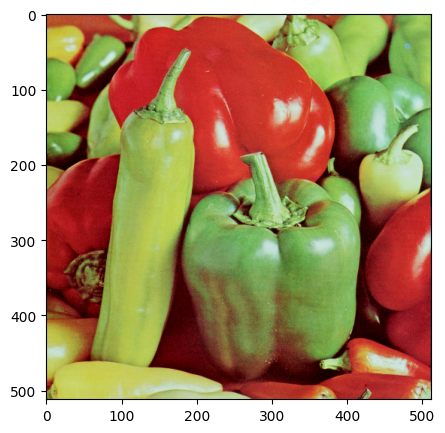

In [2]:
filename = 'legumes.jpg'
I = plt.imread(filename)

# This line is not necessary, but allows you to control the size of the displayed image:
plt.figure(figsize=(5, 5))
plt.imshow(I)
# This line is needed when using several figures, it's also a good practice to use it for readability (explicitly asking to draw the figures created)
plt.show()

**1.a.** What is the type of the image `I`? Its size? 
   What is the type of the values it contains? What is their range? 

In [3]:
######################
# Complete that part #
######################

# Tips: look for numpy attributes (e.g. https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) 
# and functions to do what you want (e.g. np.min)

print("The image is stored as a numpy array : type(I) =", type(I))
print("of shape (height, width, channels) =", I.shape)
print("The values of the image have type :", I.dtype)

The image is stored as a numpy array : type(I) = <class 'numpy.ndarray'>
of shape (height, width, channels) = (512, 512, 3)
The values of the image have type : uint8


Here is a simple function to load an image and crop it according to a bounding box. Make sure you understand every line

In [4]:
def load_image_v0(name:str, crop_window:tuple = None): 
    I = plt.imread(name)
    if crop_window is not None:
        I = I[crop_window[0]:crop_window[1],
              crop_window[2]:crop_window[3]]
    if I.dtype == np.uint8:
        # PNG images are read as 0-1 float
        # JPEG images are read as 0-255 uint8
        # Scale the values of the image between 0 and 1 (instead of 0 255)
        I = I.astype('float') / 255.
    return I

**1.b.** Use the function to display the 100 pixels *wide* and 50 pixels *high* bottom left corner of `legumes.jpg`. 

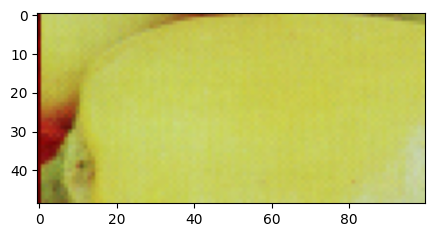

In [5]:
######################
# Complete that part #
######################
filename = 'legumes.jpg'
I = load_image_v0(filename, crop_window=(-50, -1, 0, 100))


# This line is not necessary, but allows you to control the size of the displayed image:
plt.figure(figsize=(5, 5))
plt.imshow(I)
# This line is needed when using several figures
plt.show()

**1.c.** Modify the following code so that `J` is a grid with one *vertical* line every 100 pixels, and one *horizontal* every 20 pixels. What is the difference between the two plots? What is the danger with the `nearest` interpolation?

The difference between the two plots is just the interpolation mode.

We see problems analogous to those in TP0, the nearest interpolation is bad, especially for "binary" images, or any non continuous image.

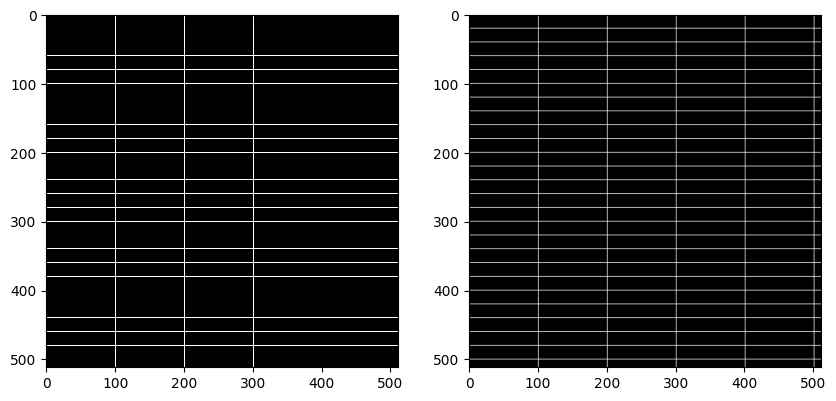

In [6]:
J = np.zeros((512, 512))

######################
# Complete that part #
######################

vertical_indices = np.arange(0, 512, 100)
horizontal_indices = np.arange(0, 512, 20)

J[horizontal_indices, :] = 1
J[:, vertical_indices] = 1


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(J, interpolation="nearest")
plt.subplot(1, 2, 2)
plt.imshow(J, interpolation="hanning")
plt.show()

**1.d.** Modify the following function so that it can load an RGB image and convert it to a grayscale image (*i.e.* converting it from a `H×W×3` array to a `H×W` array) using the formula `L = 0.2989 * R + 0.5870 * G + 0.1140 * B`, where `R`, `G` and `B` are the three color channels of the color image and `L` is the luminance (*i.e.* the grayscale image). Include a test so that your function also works if the input image is grayscale.

In [7]:
gray_scale_projection = np.array([0.2989, 0.5870, 0.1140])

def load_image(name, crop_window=None):
    I = plt.imread(name)[:, :, :3]
    ######################
    # Complete that part #
    ######################
    I = I @ gray_scale_projection

    if crop_window is not None:
        I = I[crop_window[0]:crop_window[1],
              crop_window[2]:crop_window[3]]
    I = I.astype('float') / 255.
    return I

Use your function to load a grayscale version of `legumes.jpg` and save it as a png image.

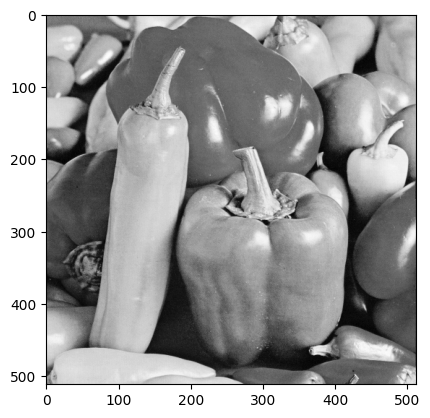

In [8]:
######################
# Complete that part #
######################

filename = "legumes.jpg"

I = load_image(filename)

plt.imshow(I)
plt.show()

**For the rest of the TP, *use only grayscale images***

**1.e.** Here is an example of how to convolve an image with a Gaussian. What is the size of the output? What are the border conditions? Replace the border conditions with zero padding and comment on the result

The output has same size as the input.

The mode is telling the function what to do on the border to preserve the size.

The 'constant' mode padds the image with the specified cval constant. Default is 0. This makes the border of the image gradually goes to 0, which is not really desirable in general.

The default mode 'reflect' replaces the constant padding by taking copies of the image. It does not make the image into a torus but it takes mirrored versions of the image.

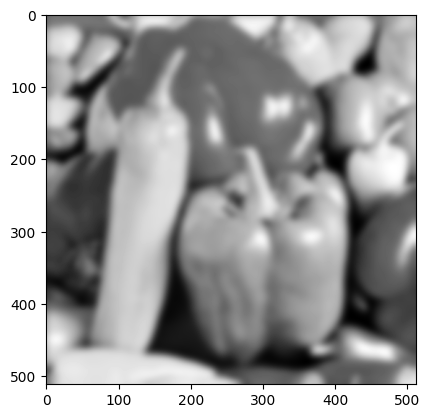

In [9]:
Ib = ndimage.gaussian_filter(I, sigma=5, mode="reflect")
plt.imshow(Ib)
plt.show()

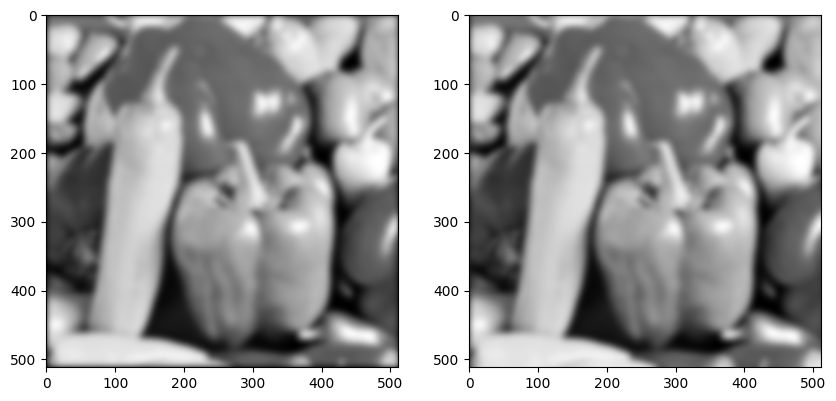

In [10]:
Ib1 = ndimage.gaussian_filter(I, sigma=5, mode="constant")
Ib2 = ndimage.gaussian_filter(I, sigma=5, mode="nearest")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Ib1)
plt.subplot(1, 2, 2)
plt.imshow(Ib2)
plt.show()

**1.f.** What does the following code do? What is its visual effect on the image?

This code simply convolves the defined kernel with the original images.

Its effect is to sharpen the edges.

In [11]:
k = np.array([[-1./9, -1./9, -1./9],
              [-1./9, 17./9, -1./9],
              [-1./9, -1./9, -1./9]])
O = ndimage.convolve(I, k)

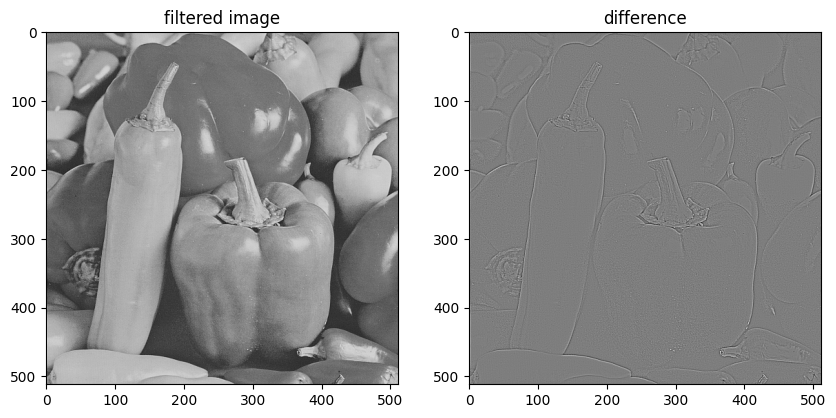

In [12]:
######################
# Complete that part #
######################

# Tip : visualize the convolved image, and the difference between the convolved image and the original one for a deeper understanding

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(O)
plt.title("filtered image")

plt.subplot(1, 2, 2)
plt.imshow(O - I)
plt.title("difference")
plt.show()

**1.g.** Write a function `compute_gradient` that returns three arrays/images: two containing the input image gradients (along each axis), and another with the gradient norm. 
It should take an optional argument `sigma` that gives the smoothing of the derivative (i.e. the standard deviation of the Gaussian kernel used to blur the image before taking the derivative). 

What is the size of the output compared to the size of the input?

In [13]:
def compute_gradient(I, sigma=0):
    ######################
    # Complete that part #
    ######################
    
    Gx = ndimage.gaussian_filter(I, sigma, order=(0, 1), mode="reflect")
    Gy = ndimage.gaussian_filter(I, sigma, order=(1, 0), mode="reflect")
    # Tip : refer to the documentation of ndimage.gaussian_filter for its parameters and their meaning

    Gn = np.sqrt(Gx**2 + Gy**2)


    return Gx, Gy, Gn

Gx, Gy, Gn = compute_gradient(I, sigma=2)

**1.h.** Visualize the three images returned by your function for different values of sigma.

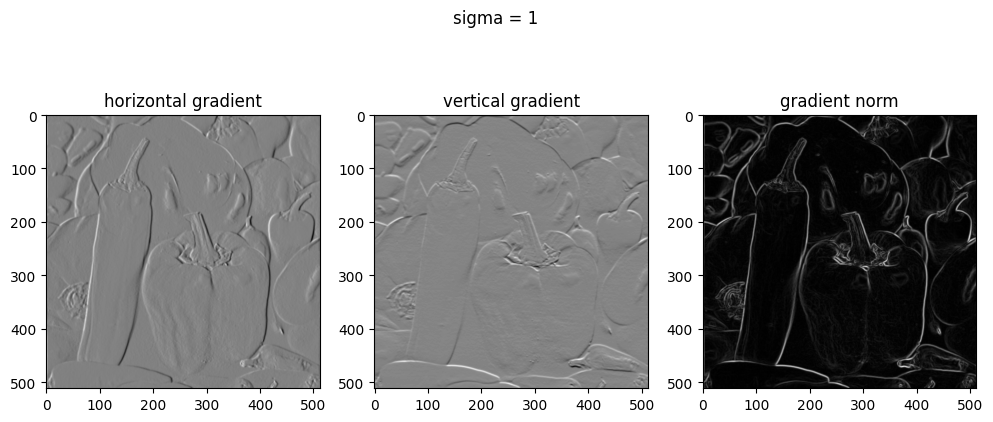

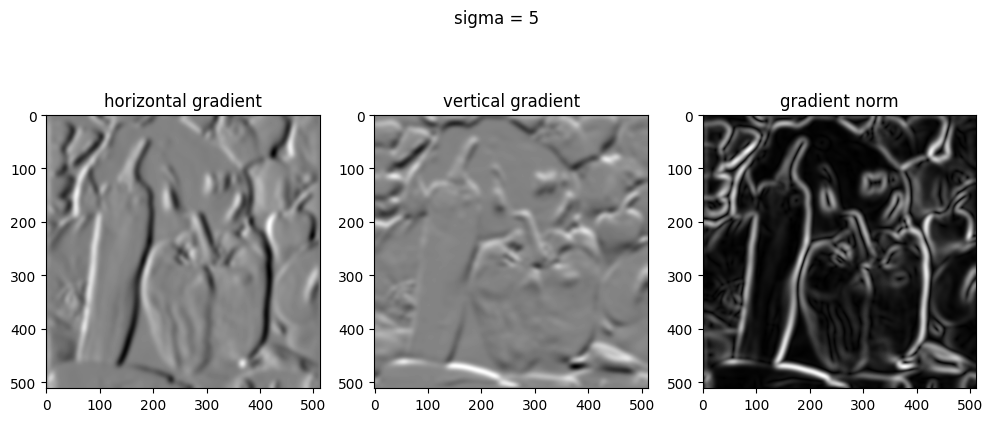

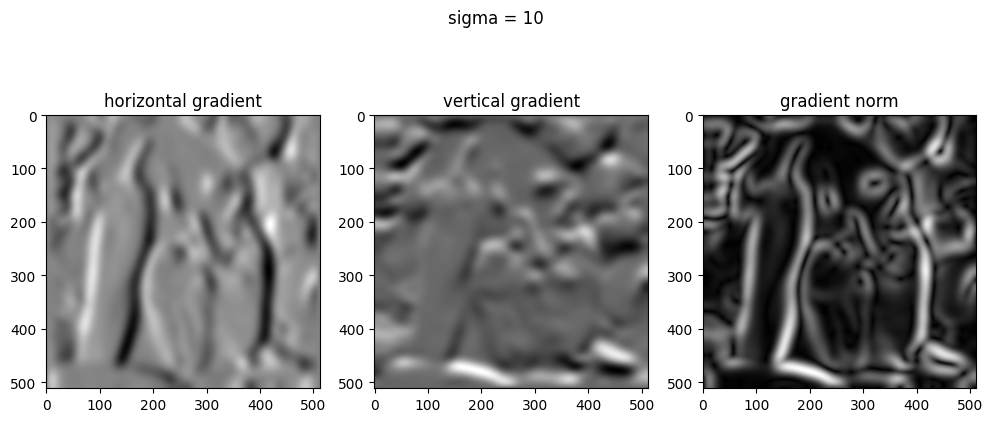

In [14]:
def visualize_gradient(I, sigma=0):
    Gx, Gy, Gn = compute_gradient(I, sigma)

    plt.figure(figsize=(12, 5))
    plt.suptitle("sigma = {}".format(sigma))
    plt.subplot(1, 3, 1)

    plt.imshow(Gx)
    plt.title("horizontal gradient")

    plt.subplot(1, 3, 2)
    plt.imshow(Gy)
    plt.title("vertical gradient")

    plt.subplot(1, 3, 3)
    plt.imshow(Gn)
    plt.title("gradient norm")

    plt.show()

visualize_gradient(I, sigma=1)
visualize_gradient(I, sigma=5)
visualize_gradient(I, sigma=10)

If you had difficulties to do this first part, it might be good to look at a few more examples before writting your own code. You can find many python tutorial for image processing online, for example http://www.scipy-lectures.org/advanced/image_processing/

## 2. Canny edges

**2.a.** Write a simple function `threshold(G, threshold)` that threshold the norm of the gradient and outputs a *binary* image. Discuss the parameters (there are two) and their visual influence of the results.

In [15]:
def threshold(G, t):
    ######################
    # Complete that part #
    ######################
    """
    t is given as a % of the maximum value of G
    """

    return G > t * np.max(G)

def visualize_threshold(Gn, t):
    Tg = threshold(Gn, t)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(Gn)
    plt.title("gradient norm")

    plt.subplot(1, 2, 2)
    plt.imshow(Tg)
    plt.title("thresholded gradient norm")
    plt.show()

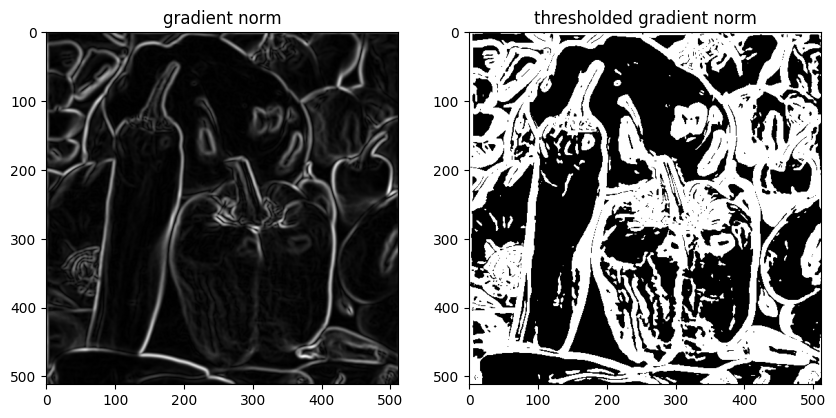

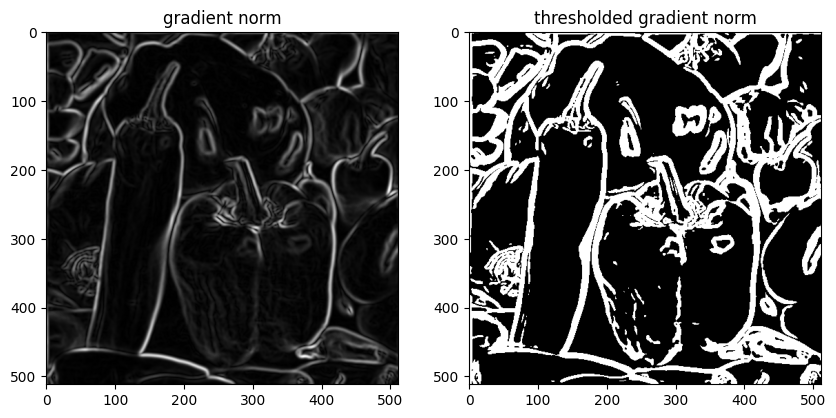

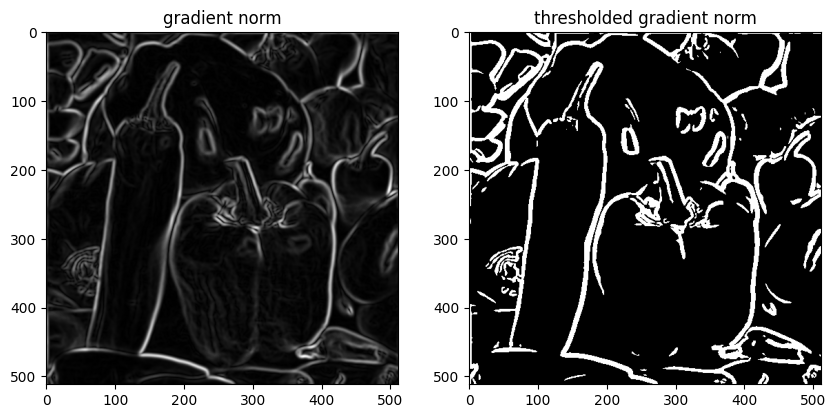

In [16]:
visualize_threshold(Gn, 0.05)
visualize_threshold(Gn, 0.1)
visualize_threshold(Gn, 0.2)

**2.b.** Write a function `nms(gradient)` which takes as input the full gradient and outputs a *binary* image with value 1 only for pixels that correspond to a maximum in the direction of the gradient. 

Display the resulting binary image for a given set of parameters, and comment on how question **1.c.** might affect your visual results.

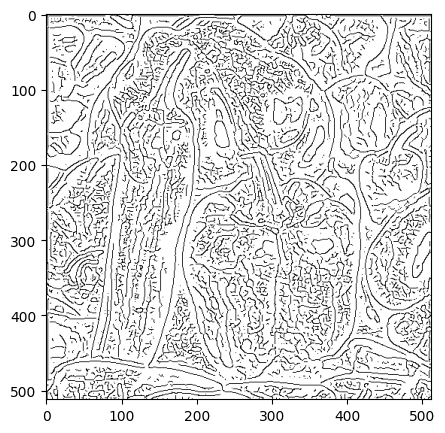

In [17]:
NEIGHBORS = np.array([[1, 0], [1, -1], [0, 1], [1, 1]])
GRAD_DIRS = np.array([[1, 0], [2**-.5, -2**-.5], [0, 1], [2**-.5, 2**-.5]])

def nms(gradient):
    Gy, Gx, Gn = gradient

    G = np.stack((Gx, Gy), axis=2)
    
    h, w = Gy.shape
    
    output = np.zeros(Gx.shape, dtype=bool)
    
    candidates = G @ GRAD_DIRS.T

    max_dir = np.argmax(np.abs(candidates), axis=2)
    
    for i in range(h):
        for j in range(w):
            dx, dy = NEIGHBORS[max_dir[i, j]]

            x1, y1 = i + dx, j + dy
            x2, y2 = i - dx, j - dy

            norms = [Gn[i, j]]

            if 0 <= x1 < h and 0 <= y1 < w:
                norms.append(Gn[x1, y1])
            if 0 <= x2 < h and 0 <= y2 < w:
                norms.append(Gn[x2, y2])
            
            if Gn[i, j] == max(norms):
                output[i, j] = True
            
    return output

plt.figure(figsize=(5, 5))
plt.imshow(1-nms(compute_gradient(I, 2))) # plot '1 - nms()' to invert colors and empghasize edges
plt.show()

**2.c.** Use `nms` and `threshold` to extract edges with a gradient norm larger than a given threshold and compare visually.

**2.d.** Implement a function computing the full Canny edges by adding a hysteresis thresholding to this processing.

Here is one way to do the hysteresis thresholding: 
  - Keep a list of the edges for which you have to visit neighbours;
  - Initialize the list with the edges corresponding to the most discriminative threshold;
  - Until the list is empty:
    * Take an edge you are sure of (*i.e.* from the list)
    * Check if its neighbours are considered edges using the less discriminative threshold;
      - If they are, add them to the output edges and in the list of edges to visit.

In [18]:
def hysteresis(Gn_nmsd, t_low, t_high):
    h, w = Gn_nmsd.shape
    
    output = np.zeros((h, w), dtype=bool)

    low_indices = threshold(Gn_nmsd, t_low)
    high_indices = threshold(Gn_nmsd, t_high)

    to_visit = np.zeros((h, w), dtype=bool)
    visited = np.zeros((h, w), dtype=bool)

    to_visit[high_indices] = True

    while np.any(to_visit):
        i, j = np.unravel_index(np.argmax(to_visit), to_visit.shape)
        to_visit[i, j] = False
        visited[i, j] = True
        output[i, j] = True

        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if abs(di) + abs(dj) != 1:
                    continue
                if 0 <= i + di < h and 0 <= j + dj < w:
                    if not visited[i + di, j + dj] and low_indices[i + di, j + dj]:
                        to_visit[i + di, j + dj] = True
    
    return output

def canny_edges(I, sigma=2, t_low=0.01, t_high=0.08):
    G = compute_gradient(I, sigma)
    Gn__mask = nms(G)
    Gn_nmsd = Gn__mask * G[2]
    return hysteresis(Gn_nmsd, t_low, t_high)

**2.e.** Use your algorithm with different parameters and comment on their respective effects.

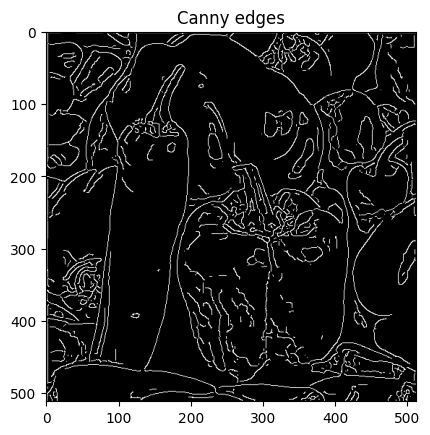

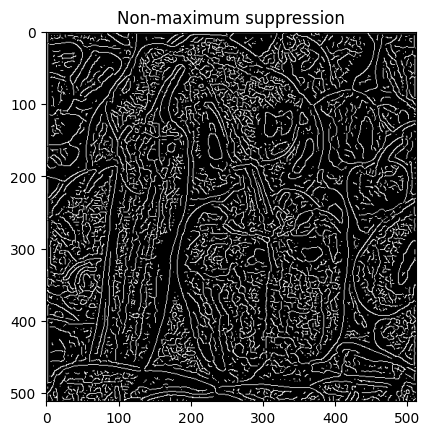

In [19]:
edges = canny_edges(I, sigma=2, t_low=0.02, t_high=0.08)

plt.imshow(edges)
plt.title("Canny edges")
plt.show()

plt.imshow(nms(compute_gradient(I, 2)))
plt.title("Non-maximum suppression")
plt.show()

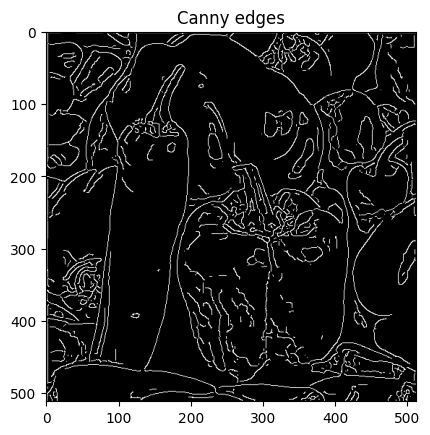

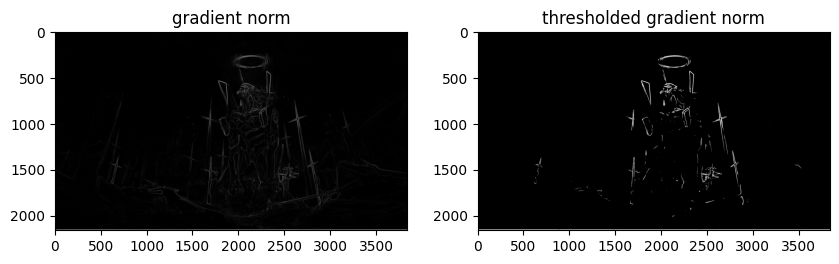

In [20]:
filename = "Eva_04.png"
I_ = load_image(filename)

#edges = canny_edges(I_, sigma=2, t_low=0.006, t_high=0.06)
nms = nms(compute_gradient(I_, 2))

#save the image
#plt.imsave('Eva_04_edges3.png', edges)
plt.imsave('Eva_04_nms.png', nms)

plt.imshow(edges)
plt.title("Canny edges")
plt.show()

Gn_ = compute_gradient(I_, 2)[2]
visualize_threshold(Gn_, 0.2)

In [21]:
filename = "OS.jpg"
I_ = load_image(filename)
Gn_ = compute_gradient(I_, 2)[2]
thresholded = threshold(Gn_, 0.05)
plt.imsave('OS_thresholded.png', thresholded)